# Mini batch variation of Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Extract csv file

In [2]:
X=pd.read_csv('./Datasets/minibatch_x_datasets.csv')
Y=pd.read_csv('./Datasets/minibatch_y_datasets.csv')

### Plot between x and y

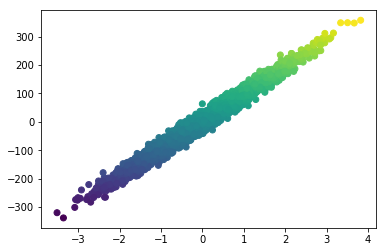

In [345]:
plt.scatter(X,Y,c=Y)
plt.show()

Here we apply gradient descent algorithm which works well with linear data

- start with random theta
- repeat until converge
- update theta according to the update rule


Make a function which will help to calculate hypothesis Y = Β0 + Β1X where Β0 is intercept(Bias) and Β1X is slope

In [3]:
def hypothesis(X,theta):
    return theta[0]+theta[1]*X

Make a function which will help to determine error between actual and predicted value

In [4]:
def error(X,Y,theta):
    m=X.shape[0]
    error=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
    return error

Make a function which help you to calculate derivative with respect to B0 and B1 f(m,b)=1/N∑i=1n(yi−(mxi+b))2

In [5]:
def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    return grad

Make a function which will help to find out the local minima i.e final theta based upon given learning rate

In [6]:
def gradient_Descent(X,Y,learning_rate=0.0001):
    theta=np.array([-2.0,0.0])
    itr=0
    error_list=[]
    theta_list=[]
    max_itr=70
   
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list,theta_list

Now we will pass our data into function which will calculate local minima and error



In [7]:
final_theta,error_list,theta_list=gradient_Descent(X.values,Y.values)

Visualization of error

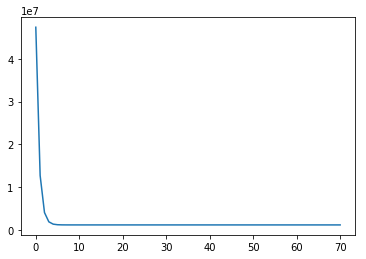

In [346]:
plt.plot(error_list)
plt.show()

Final theta i.e local minima

In [9]:
print(final_theta)

[ 1.34205181 96.14564841]


Generate some point which will fit on scatter points

In [347]:
xtest=np.linspace(-2,6,10)

In [348]:
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


In [10]:
from mpl_toolkits.mplot3d import Axes3D

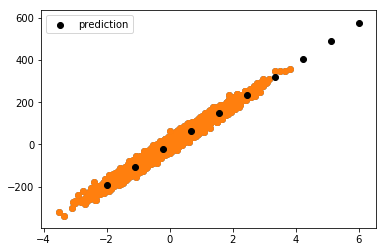

In [349]:
plt.scatter(X,Y)
plt.scatter(X,Y)
plt.scatter(xtest,hypothesis(xtest,final_theta),color="black",label="prediction")
plt.legend()
plt.show()

# Visualization of gradient Descent

In [11]:
T0=np.arange(-10,5,0.01)
T1=np.arange(0,100,0.01)

In [12]:
T0,T1=np.meshgrid(T0,T1)

In [13]:
J=np.zeros(T0.shape)

In [14]:
print(J)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
m=T0.shape[0]
n=T0.shape[1]

In [16]:
for i in range(m):
    for j in range(n):
        J[i,j]=np.sum((Y.values-T1[i,j]*X.values-T0[i,j])**2)

In [17]:
theta_list=np.array(theta_list)

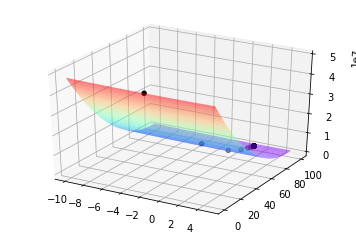

In [61]:
fig = plt.figure()
axes=fig.gca(projection='3d')
axes.scatter3D(theta_list[:,0],theta_list[:,1],error_list,c='k')
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5)

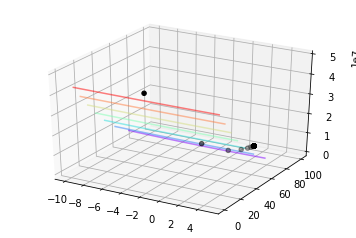

In [62]:
fig = plt.figure()
axes=fig.gca(projection='3d')
axes.scatter3D(theta_list[:,0],theta_list[:,1],error_list,c='k')
axes.contour(T0,T1,J,cmap='rainbow',alpha=0.5)

# Batch Gradient
- The major benfit of batch gradient it converge faster than normal gradient function

Make a function we will work on mini batches
- We use shuffle techique with the help of batch_size each time new data will be generated

In [350]:
def batch_gradient(X,Y,theta,batch_size=3):
    m=Y.shape[0]
    indices=np.arange(m)
    np.random.shuffle(indices)
    indices=indices[:batch_size]
    grad1=np.zeros((2,))
    for i in indices:
        h=hypothesis(X[i],theta)
        grad1[0]+=(Y[i]-h)
        grad1[1]+=(Y[i]-h)*X[i]
    return grad1

### This gradient function will work on batch_gradient variation

In [351]:
def gradient_Descent1(X,Y,learning_rate=0.01):
    theta1=np.array([-2.0,0.0])
    itr=0
    error_list1=[]
    theta_list1=[]
    max_itr=300
   
    while(itr<=max_itr):
        grad1=batch_gradient(X,Y,theta1)
        e1=error(X,Y,theta1)
        error_list1.append(e1)
        theta_list1.append((theta1[0],theta1[1]))
        theta1=theta1+learning_rate*grad1
       
        itr+=1
    return error_list1,theta_list1,theta1

In [352]:
error_list1,theta_list1,final_theta1=gradient_Descent1(X.values,Y.values)

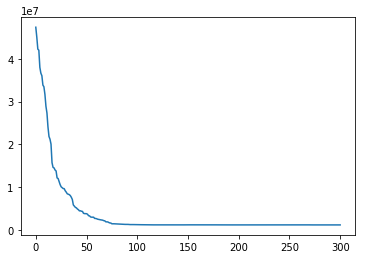

In [353]:
plt.plot(error_list1)

In [354]:
print(final_theta1)

[ 0.96126387 96.67334865]


In [377]:
xtest1=np.linspace(-2,6,10)

In [378]:
print(xtest1)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


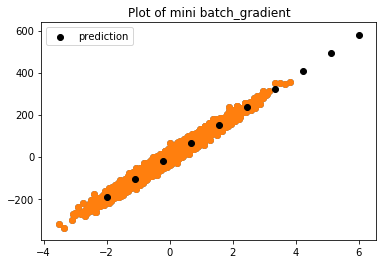

In [382]:
plt.scatter(X,Y)
plt.scatter(X,Y)
plt.title("Plot of mini batch_gradient")
plt.scatter(xtest,hypothesis(xtest1,final_theta1),color="black",label="prediction")
plt.legend()
plt.show()


In [369]:
T2=np.arange(-8,5,0.1)
T3=np.arange(0,100,1)

In [370]:
T2,T3=np.meshgrid(T2,T3)

In [371]:
J1=np.zeros(T2.shape)

In [372]:
m=T2.shape[0]
n=T3.shape[1]

In [373]:
for i in range(m):
    for j in range(n):
        J1[i,j]=np.sum((Y.values-T3[i,j]*X.values-T2[i,j])**2)

In [374]:
theta_list1=np.array(theta_list1)

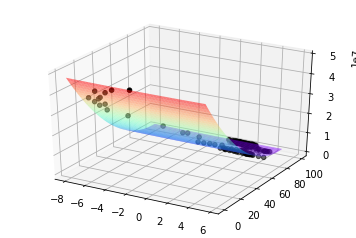

In [375]:
fig = plt.figure()
axes=fig.gca(projection='3d')
axes.scatter3D(theta_list1[:,0],theta_list1[:,1],error_list1,c='k')
axes.plot_surface(T2,T3,J1,cmap='rainbow',alpha=0.5)